In [1]:
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans,SpectralClustering

In [2]:
data = pd.read_csv('segmentation data.csv')
data2=data
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df=data.drop(columns=['ID'])
df2=df
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()


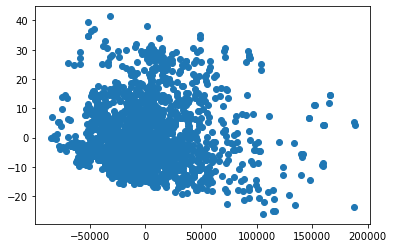

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
reduced=pd.DataFrame(pca.fit_transform(df),columns=['PCA1','PCA2'])
plt.scatter(reduced.PCA1,reduced.PCA2)
df=pd.DataFrame(df)

cluster = KMeans(n_clusters=4,init='k-means++').fit(df)


In [5]:
data['cluster']=cluster.predict(df)
reduced['cluster']=cluster.predict(df)

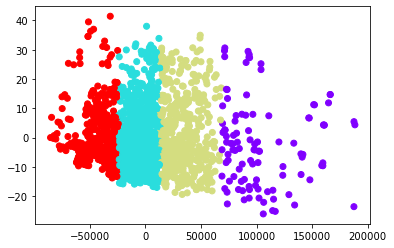

In [6]:
plt.scatter(reduced.PCA1,reduced.PCA2,c=cluster.labels_,cmap='rainbow')

In [7]:
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,100000001,0,0,67,2,124670,1,2,1
1,100000002,1,1,22,1,150773,1,2,2
2,100000003,0,0,49,1,89210,0,0,3
3,100000004,0,0,45,1,171565,1,1,2
4,100000005,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,1
1996,100001997,1,1,27,1,117744,1,0,1
1997,100001998,0,0,31,0,86400,0,0,3
1998,100001999,1,1,24,1,97968,0,0,1


In [8]:
cluster2=SpectralClustering(n_clusters=3)
#df2=scaler.fit_transform(df2)
pca2=PCA(n_components=2)

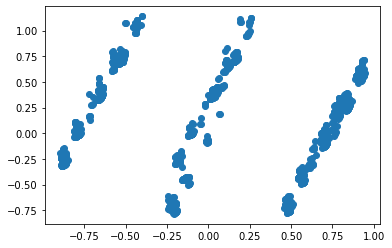

In [9]:
reduced2 = pd.DataFrame(pca2.fit_transform(df2),columns=['PCA1','PCA2'])
plt.scatter(reduced2.PCA1,reduced2.PCA2)
df2=pd.DataFrame(df2)
df2['Cluster']=cluster2.fit_predict(df2)

In [10]:
data2['Cluster']=df2['Cluster']
reduced2['cluster']=df2['Cluster']

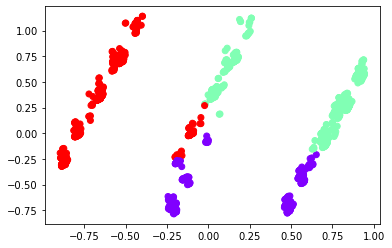

In [11]:
plt.scatter(reduced2.PCA1,reduced2.PCA2,c=cluster2.labels_,cmap='rainbow')


In [12]:
data2

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,Cluster
0,100000001,0,0,67,2,124670,1,2,1,1
1,100000002,1,1,22,1,150773,1,2,2,2
2,100000003,0,0,49,1,89210,0,0,3,0
3,100000004,0,0,45,1,171565,1,1,2,1
4,100000005,0,0,53,1,149031,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,1,0
1996,100001997,1,1,27,1,117744,1,0,1,2
1997,100001998,0,0,31,0,86400,0,0,3,0
1998,100001999,1,1,24,1,97968,0,0,1,2
